# Efficient-CapsNet Model Train

In this notebook we provide a simple interface to train Efficient-CapsNet on the three dataset discussed in "Efficient-CapsNet: Capsule Network with Self-Attention Routing":

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

The hyperparameters have been only slightly investigated. So, there's a lot of room for improvements. Good luck!

**NB**: remember to modify the "config.json" file with the appropriate parameters.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages, plotHistory
from models import EfficientCapsNet

c:\Users\20203080\Anaconda3\envs\8p361\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\20203080\Anaconda3\envs\8p361\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.

In [3]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [4]:
# some parameters
model_name = "8P361"

# 1.0 Import the Dataset

In [5]:
dataset = Dataset(model_name, config_path='config.json')

## 1.1 Visualize imported dataset

In [6]:
n_images = 20 # number of images to be plotted
#plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [7]:
model_train = EfficientCapsNet(model_name, mode='train', verbose=True)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 45, 45, 32)        4736      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 45, 45, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 45, 45, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 43, 43, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 43, 43, 64)        0         
                                                 

# 3.0 Train the Model

In [8]:
#dataset_train, dataset_val = dataset.get_tf_data() 

In [9]:
history = model_train.train(dataset, initial_epoch=0)

Found 144000 files belonging to 2 classes.
Found 16000 files belonging to 2 classes.
------------------------------8P361 train------------------------------
Epoch 1/5
9000/9000 [==============================] - ETA: 0s - loss: 0.5669 - Efficient_CapsNet_loss: 0.1497 - Generator_loss: 1.0642 - Efficient_CapsNet_accuracy: 0.7717
Epoch 1: val_Efficient_CapsNet_accuracy improved from -inf to 0.50000, saving model to bin\efficient_capsnet8P361_new_train.h5
9000/9000 [==============================] - 853s 94ms/step - loss: 0.5669 - Efficient_CapsNet_loss: 0.1497 - Generator_loss: 1.0642 - Efficient_CapsNet_accuracy: 0.7717 - val_loss: 0.3902 - val_Efficient_CapsNet_loss: 0.2653 - val_Generator_loss: 0.3187 - val_Efficient_CapsNet_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/5
9000/9000 [==============================] - ETA: 0s - loss: 0.3913 - Efficient_CapsNet_loss: 0.1236 - Generator_loss: 0.6829 - Efficient_CapsNet_accuracy: 0.8089
Epoch 2: val_Efficient_CapsNet_accuracy did not improve f

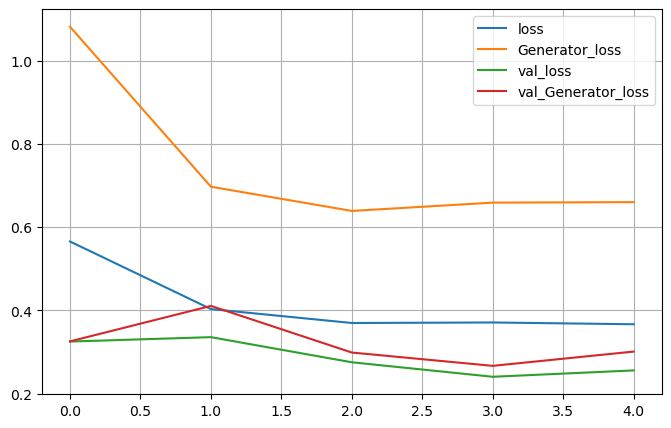

In [ ]:
plotHistory(history)